In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
data=pd.read_csv('D:/STATISTIKA/DSC 2020/TUGAS FINAL/Final Project/ecommerce_churn.csv', sep=";", index_col=0)
data.head(10)

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,DeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderIncreaseFromLastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
CustomerID,,,,,,,,,,,,,,,,,,,
50027,0,8.0,Mobile Phone,3,6.0,E wallet,Male,3.0,3,Fashion,4,Divorced,2,0,13.0,1.0,1.0,6.0,"172,95"
50028,0,NaN,Phone,3,12.0,E wallet,Male,2.0,3,Laptop & Accessory,3,Divorced,3,1,20.0,0.0,4.0,5.0,"123,06"
50029,0,18.0,Phone,1,NaN,Debit Card,Male,2.0,3,Laptop & Accessory,4,Married,9,0,18.0,1.0,1.0,15.0,"123,48"
50030,0,5.0,Computer,3,14.0,E wallet,Female,2.0,3,Fashion,2,Single,2,0,14.0,2.0,3.0,7.0,"189,98"
50031,0,2.0,Computer,1,6.0,COD,Male,2.0,3,Laptop & Accessory,3,Divorced,2,0,13.0,0.0,1.0,9.0,"143,19"
50032,0,0.0,Mobile Phone,1,13.0,Credit Card,Male,2.0,4,Laptop & Accessory,3,Divorced,3,0,17.0,1.0,1.0,0.0,"161,32"
50033,0,30.0,Phone,1,15.0,CC,Female,3.0,4,Mobile,4,Divorced,5,1,20.0,1.0,1.0,0.0,"133,46"
50034,0,13.0,Mobile Phone,3,10.0,E wallet,Male,3.0,4,Fashion,2,Divorced,8,0,11.0,2.0,2.0,11.0,"208,55"
50035,0,NaN,Computer,3,8.0,E wallet,Female,3.0,3,Mobile,3,Divorced,7,0,18.0,1.0,1.0,2.0,"122,31"


In [2]:
df=pd.DataFrame(data)

In [3]:
df.shape

(1896, 19)

### Karakteristik Data 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1896 entries, 50027 to 55622
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      1896 non-null   int64  
 1   Tenure                     1739 non-null   float64
 2   PreferredLoginDevice       1896 non-null   object 
 3   CityTier                   1896 non-null   int64  
 4   WarehouseToHome            1744 non-null   float64
 5   PreferredPaymentMode       1896 non-null   object 
 6   Gender                     1896 non-null   object 
 7   HourSpendOnApp             1766 non-null   float64
 8   DeviceRegistered           1896 non-null   int64  
 9   PreferedOrderCat           1896 non-null   object 
 10  SatisfactionScore          1896 non-null   int64  
 11  MaritalStatus              1896 non-null   object 
 12  NumberOfAddress            1896 non-null   int64  
 13  Complain                   1896 non-null   

### Statistika Deskriptif

In [5]:
df.describe()

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,DeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderIncreaseFromLastYear,CouponUsed,OrderCount,DaySinceLastOrder
count,1896.000000,1739.000000,1896.000000,1744.000000,1766.000000,1896.000000,1896.000000,1896.000000,1896.000000,1855.000000,1817.000000,1837.000000,1812.000000
mean,0.500000,7.347901,1.719409,15.922018,2.682899,3.543776,3.275316,4.088080,0.385549,15.391914,1.470556,2.694066,3.786976
std,0.500132,8.149302,0.936148,8.498368,0.679286,1.015023,1.269551,2.694888,0.486853,3.695976,1.862077,2.866878,3.540237
min,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000
25%,0.000000,1.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,12.000000,0.000000,1.000000,1.000000
50%,0.500000,4.000000,1.000000,14.000000,3.000000,3.000000,3.000000,3.000000,0.000000,14.000000,1.000000,2.000000,3.000000
75%,1.000000,13.000000,3.000000,22.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000
max,1.000000,50.000000,3.000000,36.000000,4.000000,6.000000,5.000000,21.000000,1.000000,26.000000,16.000000,16.000000,46.000000


### Prepocessing Data 

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use("seaborn")
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


<AxesSubplot:>

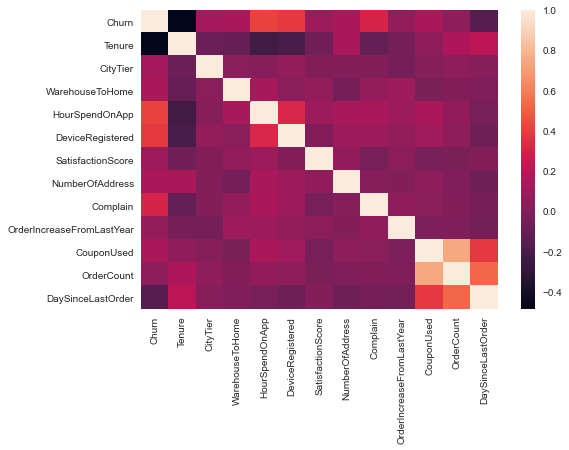

In [7]:
corr=df.corr()
sns.heatmap(corr)

In [9]:
import numpy as np

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1896 entries, 50027 to 55622
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      1896 non-null   int64  
 1   Tenure                     1739 non-null   float64
 2   PreferredLoginDevice       1896 non-null   object 
 3   CityTier                   1896 non-null   int64  
 4   WarehouseToHome            1744 non-null   float64
 5   PreferredPaymentMode       1896 non-null   object 
 6   Gender                     1896 non-null   object 
 7   HourSpendOnApp             1766 non-null   float64
 8   DeviceRegistered           1896 non-null   int64  
 9   PreferedOrderCat           1896 non-null   object 
 10  SatisfactionScore          1896 non-null   int64  
 11  MaritalStatus              1896 non-null   object 
 12  NumberOfAddress            1896 non-null   int64  
 13  Complain                   1896 non-null   

In [11]:
np.sum(df.isnull())

Churn                          0
Tenure                       157
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome              152
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp               130
DeviceRegistered               0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderIncreaseFromLastYear     41
CouponUsed                    79
OrderCount                    59
DaySinceLastOrder             84
CashbackAmount                 0
dtype: int64

In [12]:
from scipy.stats import mode

In [13]:
df["Tenure"].mean()

7.347901092581943

In [14]:
df["WarehouseToHome"].mean()

15.922018348623853

In [15]:
df["HourSpendOnApp"].mean()

2.6828992072480182

In [16]:
df["OrderIncreaseFromLastYear"].mean()

15.391913746630728

In [17]:
df["CouponUsed"].mean()

1.4705558613098515

In [18]:
df["OrderCount"].mean()

2.694066412629287

In [19]:
df["DaySinceLastOrder"].mean()

3.7869757174392937

In [20]:
df["Tenure"]=df["Tenure"].fillna(df["Tenure"].mean())
df["WarehouseToHome"]=df["WarehouseToHome"].fillna(df["WarehouseToHome"].mean())
df["HourSpendOnApp"]=df["HourSpendOnApp"].fillna(df["HourSpendOnApp"].mean())
df["OrderIncreaseFromLastYear"]=df["OrderIncreaseFromLastYear"].fillna(df["OrderIncreaseFromLastYear"].mean())
df["CouponUsed"]=df["CouponUsed"].fillna(df["CouponUsed"].mean())
df["OrderCount"]=df["OrderCount"].fillna(df["OrderCount"].mean())
df["DaySinceLastOrder"]=df["DaySinceLastOrder"].fillna(df["DaySinceLastOrder"].mean())

In [21]:
df.isnull().sum()

Churn                        0
Tenure                       0
PreferredLoginDevice         0
CityTier                     0
WarehouseToHome              0
PreferredPaymentMode         0
Gender                       0
HourSpendOnApp               0
DeviceRegistered             0
PreferedOrderCat             0
SatisfactionScore            0
MaritalStatus                0
NumberOfAddress              0
Complain                     0
OrderIncreaseFromLastYear    0
CouponUsed                   0
OrderCount                   0
DaySinceLastOrder            0
CashbackAmount               0
dtype: int64

In [22]:
from scipy import stats
z=np.abs(stats.zscore(df._get_numeric_data()))
print(z)

[[1.00000000e+00 8.35771126e-02 1.36829758e+00 ... 2.58210991e-01
  6.00487593e-01 6.39607762e-01]
 [1.00000000e+00 1.13834553e-16 1.36829758e+00 ... 8.06947096e-01
  4.62908013e-01 3.50587995e-01]
 [1.00000000e+00 1.36524024e+00 7.68681175e-01 ... 2.58210991e-01
  6.00487593e-01 3.24078566e+00]
 ...
 [1.00000000e+00 1.62157287e+00 7.68681175e-01 ... 3.03420564e+00
  2.58969922e+00 1.50666706e+00]
 [1.00000000e+00 8.52574990e-01 1.36829758e+00 ... 2.90525115e-01
  2.46022391e-01 5.16471305e-01]
 [1.00000000e+00 8.52574990e-01 1.36829758e+00 ... 8.39261220e-01
  0.00000000e+00 8.05491071e-01]]


In [23]:
outlier=df[(z<3).all(axis=1)]
print(outlier.shape)

(1795, 19)


In [24]:
import seaborn as sns
sns.set(style="whitegrid")

In [25]:
c=pd.DataFrame([])
c["Keterangan:"]=["tidak ada outlier","outlier"]
c["jumlah observasi"]=[1795,1896-1795]
c

,Keterangan:,jumlah observasi
0,tidak ada outlier,1795
1,outlier,101


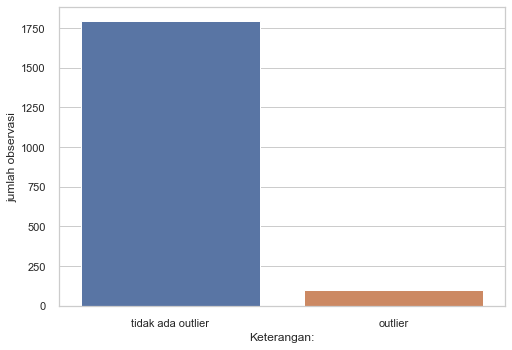

In [26]:
plot=sns.barplot(x="Keterangan:",y="jumlah observasi",data=c)

### Visualisasi Data 

In [27]:
sns.set(style="whitegrid")

<AxesSubplot:xlabel='Tenure', ylabel='PreferredLoginDevice'>

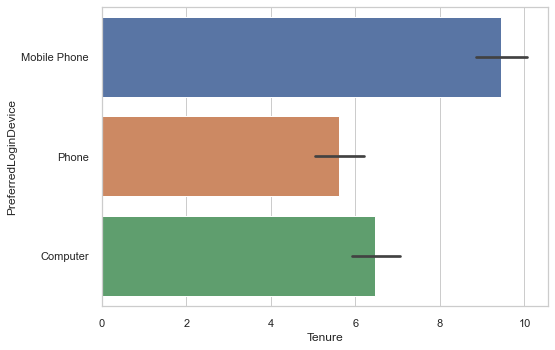

In [28]:
sns.barplot(x="Tenure",y="PreferredLoginDevice",data=df)

<AxesSubplot:xlabel='CityTier', ylabel='PreferredPaymentMode'>

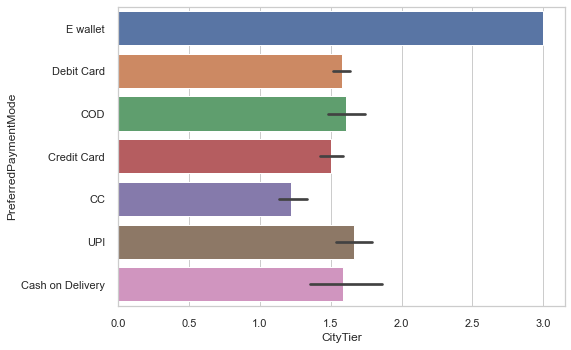

In [29]:
sns.barplot(x="CityTier",y="PreferredPaymentMode",data=df)

<AxesSubplot:xlabel='Gender', ylabel='SatisfactionScore'>

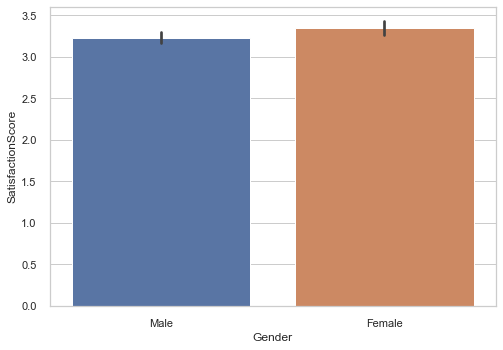

In [30]:
sns.barplot(y="SatisfactionScore",x="Gender",data=df)

In [31]:
df.head(5)

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,DeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderIncreaseFromLastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
CustomerID,,,,,,,,,,,,,,,,,,,
50027,0,8.000000,Mobile Phone,3,6.000000,E wallet,Male,3.0,3,Fashion,4,Divorced,2,0,13.0,1.0,1.0,6.0,"172,95"
50028,0,7.347901,Phone,3,12.000000,E wallet,Male,2.0,3,Laptop & Accessory,3,Divorced,3,1,20.0,0.0,4.0,5.0,"123,06"
50029,0,18.000000,Phone,1,15.922018,Debit Card,Male,2.0,3,Laptop & Accessory,4,Married,9,0,18.0,1.0,1.0,15.0,"123,48"
50030,0,5.000000,Computer,3,14.000000,E wallet,Female,2.0,3,Fashion,2,Single,2,0,14.0,2.0,3.0,7.0,"189,98"
50031,0,2.000000,Computer,1,6.000000,COD,Male,2.0,3,Laptop & Accessory,3,Divorced,2,0,13.0,0.0,1.0,9.0,"143,19"


In [32]:
kategori=["Churn","Tenure","PreferredLoginDevice","CityTier","WarehouseToHome","PreferredPaymentMode","Gender","HourSpendOnApp","DeviceRegistered","PreferedOrderCat","SatisfactionScore","MaritalStatus","NumberOfAddress","Complain","OrderIncreaseFromLastYear","CouponUsed","OrderCount","DaySinceLastOrder","CashbackAmount","CustomerID"]
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for feature in kategori:
    if feature in df.columns.values:
        df[feature]=le.fit_transform(df[feature])

In [33]:
df.head(5)

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,DeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderIncreaseFromLastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
CustomerID,,,,,,,,,,,,,,,,,,,
50027,0,9,1,2,1,5,1,4,2,0,3,0,1,0,2,1,0,7,894
50028,0,8,2,2,7,5,1,2,2,2,2,0,2,1,10,0,4,6,109
50029,0,19,2,0,11,4,1,2,2,2,3,1,8,0,8,1,0,16,129
50030,0,5,0,2,9,5,0,2,2,0,1,2,1,0,3,3,3,8,995
50031,0,2,0,0,1,1,1,2,2,2,2,0,1,0,2,0,0,10,456


In [34]:
df.dtypes

Churn                        int64
Tenure                       int64
PreferredLoginDevice         int32
CityTier                     int64
WarehouseToHome              int64
PreferredPaymentMode         int32
Gender                       int32
HourSpendOnApp               int64
DeviceRegistered             int64
PreferedOrderCat             int32
SatisfactionScore            int64
MaritalStatus                int32
NumberOfAddress              int64
Complain                     int64
OrderIncreaseFromLastYear    int64
CouponUsed                   int64
OrderCount                   int64
DaySinceLastOrder            int64
CashbackAmount               int32
dtype: object

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [36]:
dfx=np.array([df["Churn"],df["Tenure"],df["PreferredLoginDevice"],df["CityTier"],df["WarehouseToHome"],df["PreferredPaymentMode"],df["Gender"],df["HourSpendOnApp"],df["DeviceRegistered"],df["PreferedOrderCat"],df["SatisfactionScore"],df["MaritalStatus"],df["NumberOfAddress"],df["Complain"],df["OrderIncreaseFromLastYear"],df["CouponUsed"],df["OrderCount"],df["DaySinceLastOrder"],df["CashbackAmount"]])
dfx.shape

(19, 1896)

In [37]:
import numpy as np
dfx

array([[   0,    0,    0, ...,    1,    1,    1],
       [   9,    8,   19, ...,   21,   15,   15],
       [   1,    2,    2, ...,    2,    0,    1],
       ...,
       [   0,    4,    0, ...,   10,    1,    2],
       [   7,    6,   16, ...,   10,    2,    1],
       [ 894,  109,  129, ...,  572, 1001, 1163]], dtype=int64)

In [38]:
dfxt=dfx.transpose()
dfxt.shape

(1896, 19)

In [39]:
df_std=StandardScaler().fit_transform(dfxt)
df_std

array([[-1.        ,  0.15238862,  0.        , ..., -0.61514489,
         0.75823642,  0.69597433],
       [-1.        ,  0.02990925,  1.27408307, ...,  0.64403429,
         0.4916162 , -1.40369721],
       [-1.        ,  1.37718225,  1.27408307, ..., -0.61514489,
         3.15781846, -1.35020239],
       ...,
       [ 1.        ,  1.62214097,  1.27408307, ...,  2.53280305,
         1.5580971 , -0.16529221],
       [ 1.        ,  0.8872648 , -1.27408307, ..., -0.3003501 ,
        -0.57486471,  0.9821716 ],
       [ 1.        ,  0.8872648 ,  0.        , ...,  0.0144447 ,
        -0.84148493,  1.41547961]])

In [40]:
pcafs=PCA(n_components=0.99,whiten=True)
dffs_pca=pcafs.fit_transform(df_std)

In [41]:
print('Original number of features:', df_std.shape[1])
print('Reduced numer of features:', dffs_pca.shape[1])

Original number of features: 19
Reduced numer of features: 19


In [42]:
datafs_pca=pd.DataFrame(dffs_pca, columns=["PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10","PC11","PC12","PC13","PC14","PC15","PC16","PC16","PC17","PC18"])
datafs_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC16,PC17,PC18
0,0.991061,-0.791531,-1.199349,-0.494453,-0.505124,-0.980995,-1.391311,0.238887,0.461436,-0.757201,1.014847,0.847185,-0.886289,1.859522,-0.532059,0.329789,-0.582099,-0.789959,0.460501
1,0.013010,-0.916870,-0.041003,-1.159963,-0.120478,0.795067,-1.327143,-1.275186,2.000735,0.549203,0.201364,1.725538,-0.355854,-0.387169,0.292335,-0.934015,-1.367768,-0.880297,-1.968721
2,0.586502,-1.323738,0.642445,1.115925,0.744249,-0.290776,-0.714751,0.136711,1.396598,1.475962,-0.934663,-0.800207,-0.227897,0.166726,-0.023552,-3.507995,-2.045229,-2.823601,0.940343
3,1.501693,-0.333346,-0.996840,-2.139750,-0.512295,-0.404678,1.632798,0.554481,-0.145323,-0.047605,-0.525205,-0.149211,0.143683,0.247029,-0.875580,-0.128623,-0.741364,0.444903,0.528012
4,0.128508,-1.505252,0.727748,-0.109250,-0.551431,0.079767,0.237154,1.438357,-1.183170,-0.693939,1.663824,1.128302,-0.805240,0.545534,-0.806209,-2.132487,-0.429827,-0.456748,0.279931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1891,-0.585363,1.104813,-0.662650,-0.418115,0.400045,-0.800175,-0.432107,1.087248,1.542506,-0.750662,1.729517,0.567215,1.313184,-0.622531,0.755144,0.260131,-0.021773,-0.351991,0.675589
1892,-0.137357,1.239250,0.632072,1.978032,-2.054261,1.105822,0.076286,-0.788903,-0.171400,0.292066,-0.582799,0.595126,1.197791,0.257231,-0.689337,-1.193696,0.146619,1.491809,0.262364
1893,1.218115,1.144666,2.975984,2.413037,-0.849762,-0.775563,-0.987460,0.176549,-0.335981,0.273723,-1.777081,-0.184379,1.061875,0.264382,1.914218,-0.059401,-0.003810,-1.485313,0.299184
1894,0.639250,0.964767,-1.391748,1.689969,-1.534752,-0.725495,-0.026892,0.546094,-0.000727,-0.518675,0.198402,0.458334,0.950286,0.866539,1.001459,0.520574,0.293349,-1.076304,0.751321


In [43]:
from sklearn import decomposition

In [44]:
pcafe=decomposition.PCA(n_components=2)
dffe_pca=pcafe.fit_transform(df_std)

In [45]:
print('Original number of features:', df_std.shape[1])
print('Reduced numer of features:', dffe_pca.shape[1])

Original number of features: 19
Reduced numer of features: 2


In [63]:
datafe_pca=pd.DataFrame(dffe_pca, columns=["PC1","PC2"])
datafe_pca

,PC1,PC2
0,1.633933,-1.227620
1,0.019964,-1.415157
2,0.962678,-2.054830
3,2.476045,-0.515067
4,0.209294,-2.325308
...,...,...
1891,-0.965076,1.711436
1892,-0.229689,1.911286
1893,2.010079,1.765956
1894,1.054747,1.488245


### Kmeans 

In [47]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
data.tail(5)

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,DeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderIncreaseFromLastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
CustomerID,,,,,,,,,,,,,,,,,,,
55599,1,1,0,2,12,5,1,4,3,4,4,1,2,0,10,3,1,1,451
55603,1,1,1,0,3,3,1,4,3,4,0,1,10,1,4,4,3,3,893
55605,1,21,2,0,9,1,1,5,3,4,2,1,9,0,1,8,10,10,572
55613,1,15,0,2,3,4,1,5,3,2,2,1,8,0,2,3,1,2,1001
55622,1,15,1,2,31,5,1,4,4,0,4,1,5,1,3,4,2,1,1163


In [49]:
from sklearn import preprocessing
#create scaler
minmax_norm = preprocessing.MinMaxScaler(feature_range = (0,1))
#scale feature
data_norm = minmax_norm.fit_transform(data)
#show feature
data_norm

array([[0.        , 0.28125   , 0.5       , ..., 0.        , 0.36842105,
        0.67933131],
       [0.        , 0.25      , 1.        , ..., 0.25      , 0.31578947,
        0.08282675],
       [0.        , 0.59375   , 1.        , ..., 0.        , 0.84210526,
        0.09802432],
       ...,
       [1.        , 0.65625   , 1.        , ..., 0.625     , 0.52631579,
        0.43465046],
       [1.        , 0.46875   , 0.        , ..., 0.0625    , 0.10526316,
        0.7606383 ],
       [1.        , 0.46875   , 0.5       , ..., 0.125     , 0.05263158,
        0.8837386 ]])

In [50]:
# Create scaler
scaler = preprocessing.StandardScaler()
# Transform the feature
data_scaled = scaler.fit_transform(data)
#show feature
data_scaled

array([[-1.        ,  0.15238862,  0.        , ..., -0.61514489,
         0.75823642,  0.69597433],
       [-1.        ,  0.02990925,  1.27408307, ...,  0.64403429,
         0.4916162 , -1.40369721],
       [-1.        ,  1.37718225,  1.27408307, ..., -0.61514489,
         3.15781846, -1.35020239],
       ...,
       [ 1.        ,  1.62214097,  1.27408307, ...,  2.53280305,
         1.5580971 , -0.16529221],
       [ 1.        ,  0.8872648 , -1.27408307, ..., -0.3003501 ,
        -0.57486471,  0.9821716 ],
       [ 1.        ,  0.8872648 ,  0.        , ...,  0.0144447 ,
        -0.84148493,  1.41547961]])

In [51]:
from sklearn.cluster import KMeans

In [52]:
Sum_of_squared_distances = []
range_n_clusters =[1,2,3,4,5,6,7,8,9,10]
for n_clusters in range_n_clusters:
    model=KMeans(n_clusters=n_clusters, init='random', n_init=10, random_state=0)
    model.fit(data)
    Sum_of_squared_distances.append(model.inertia_)

In [53]:
model=KMeans(n_clusters=n_clusters, init='random', n_init=10, random_state=0)

In [54]:
model.fit(data)

KMeans(init='random', n_clusters=10, random_state=0)

In [55]:
print(model.fit(data))

KMeans(init='random', n_clusters=10, random_state=0)


In [56]:
Sum_of_squared_distances.append(model.inertia_)

In [57]:
Sum_of_squared_distances

[265402882.50052804,
 70696136.63422145,
 29502941.632383805,
 17377586.505353365,
 11157398.407456908,
 7866625.558418737,
 6091530.342266784,
 4642485.916768607,
 3791517.4360467773,
 3112361.399782663,
 3112361.399782663]

In [58]:
from sklearn.metrics import silhouette_samples,silhouette_score
sil=[]
range_n_clusters=[2,3,4,5,6,7,8,9,10]
print("Number of clusters : \n", range_n_clusters)
for n_clusters in range_n_clusters:
    clusterer=KMeans(n_clusters=n_clusters, init='random',n_init=10, random_state=0)
    preds=clusterer.fit_predict(data)
    centers=clusterer.cluster_centers_
    score=silhouette_score(df,preds,metric="euclidean")
    sil.append(score)
    print("clusters=",n_clusters,"score",score)

Number of clusters : 
 [2, 3, 4, 5, 6, 7, 8, 9, 10]
clusters= 2 score 0.6067134931498721
clusters= 3 score 0.5937868695929988
clusters= 4 score 0.5619530561615139
clusters= 5 score 0.5480473250571112
clusters= 6 score 0.5362152692148867
clusters= 7 score 0.5152046764596637
clusters= 8 score 0.5112854786250497
clusters= 9 score 0.4993855032723777
clusters= 10 score 0.49769372423229213


In [59]:
km1=KMeans(n_clusters=2,init='random',n_init=10, random_state=0)
km1.fit(data)
y_km1=km1.predict(data)
y_km1=pd.DataFrame(y_km1,columns=["cluster"])

In [60]:
centroid=km1.cluster_centers_
centroid

array([[4.76086957e-01, 9.72500000e+00, 7.17391304e-01, 9.22826087e-01,
        1.17630435e+01, 3.77717391e+00, 6.05434783e-01, 3.34456522e+00,
        2.61521739e+00, 1.75978261e+00, 2.25652174e+00, 1.08804348e+00,
        3.56413043e+00, 3.83695652e-01, 4.70217391e+00, 2.24347826e+00,
        2.87173913e+00, 5.33478261e+00, 9.63853261e+02],
       [5.22540984e-01, 5.89959016e+00, 1.26639344e+00, 5.27663934e-01,
        1.08770492e+01, 3.11577869e+00, 6.20901639e-01, 3.15061475e+00,
        2.47643443e+00, 3.10963115e+00, 2.29303279e+00, 1.18442623e+00,
        2.61782787e+00, 3.87295082e-01, 4.86987705e+00, 1.35450820e+00,
        1.08913934e+00, 3.04508197e+00, 3.22679303e+02]])

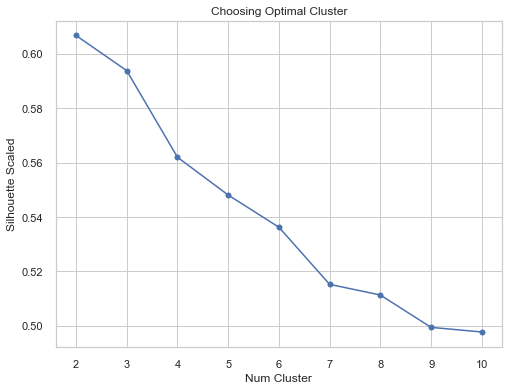

In [61]:
plt.figure(figsize=(8,6))
plt.plot(range_n_clusters,sil,'-o')
plt.title("Choosing Optimal Cluster")
plt.xlabel("Num Cluster")
plt.ylabel("Silhouette Scaled")
plt.xticks(range_n_clusters)
plt.show()

In [62]:
centroidpd=pd.DataFrame(centroid)
centroidpd

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.476087,9.72500,0.717391,0.922826,11.763043,3.777174,0.605435,3.344565,2.615217,1.759783,2.256522,1.088043,3.564130,0.383696,4.702174,2.243478,2.871739,5.334783,963.853261
1,0.522541,5.89959,1.266393,0.527664,10.877049,3.115779,0.620902,3.150615,2.476434,3.109631,2.293033,1.184426,2.617828,0.387295,4.869877,1.354508,1.089139,3.045082,322.679303
